In [2]:
import numpy as np
from numpy.fft import fft2
import scipy.signal as sig
from scipy.fftpack import dct, idct
from scipy.stats import entropy
import matplotlib.pyplot as plt
import glymur as gly
import skimage.filters as filt
import skimage.morphology as morph
%matplotlib inline

In [3]:
files = ['/Volumes/ahrenslab/davis/data/raw/20150623/test_cont_expr61_ramp10_20150623_211654/MI_Projection_XY_SPC00_TM00000_CM0_CHN00_PH0.tif',
         '/Volumes/ahrenslab/davis/data/raw/20150623/test_discont_expr61_ramp10_20150623_211642/MI_Projection_XY_SPC00_TM00000_CM0_CHN00_PH0.tif']

In [170]:
#tmp = plt.imread(files[0])
ims = [gly.Jp2k(f).read().astype('float32') for f in files]

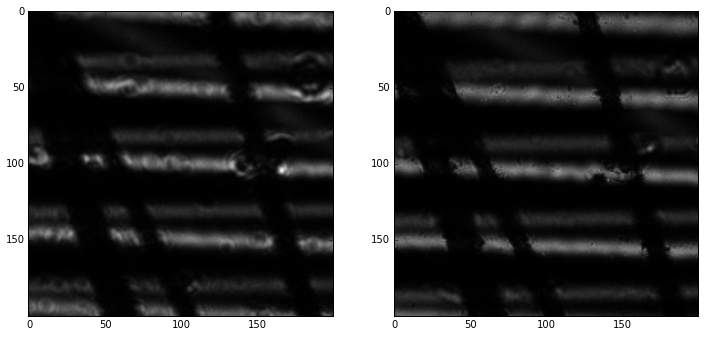

In [265]:
plt.figure(figsize=(12,8))
xr = range(300,500)
yr = range(300,500)
plt.subplot(121)
im1= plt.imshow(ims[0][np.ix_(yr,xr)], cmap = 'gray')
plt.subplot(122)
plt.imshow(ims[1][np.ix_(yr,xr)], clim = im1.get_clim(), cmap = 'gray')

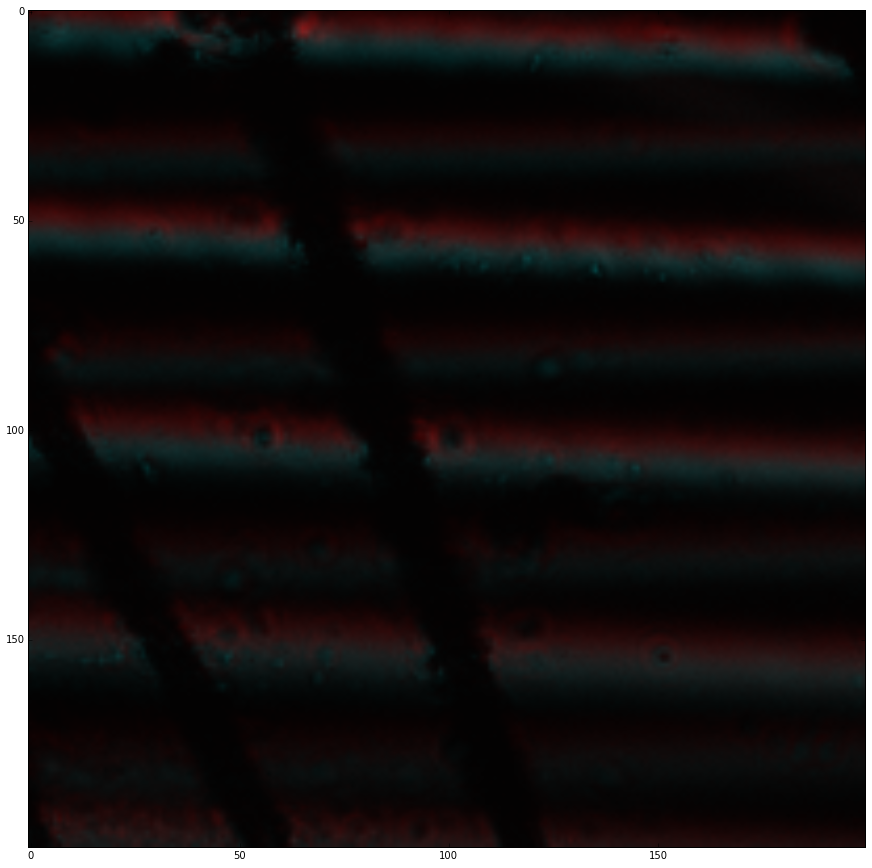

In [176]:
colIm = np.zeros(np.hstack([ims[0].shape, 3]))
colIm[:,:,0] = ims[0] / ims[0].max()
colIm[:,:,2] = ims[1] / ims[1].max()
colIm[:,:,1] = ims[1] / ims[1].max()
plt.figure(figsize=(15,15))
plt.imshow(colIm[400:600,400:600,:])

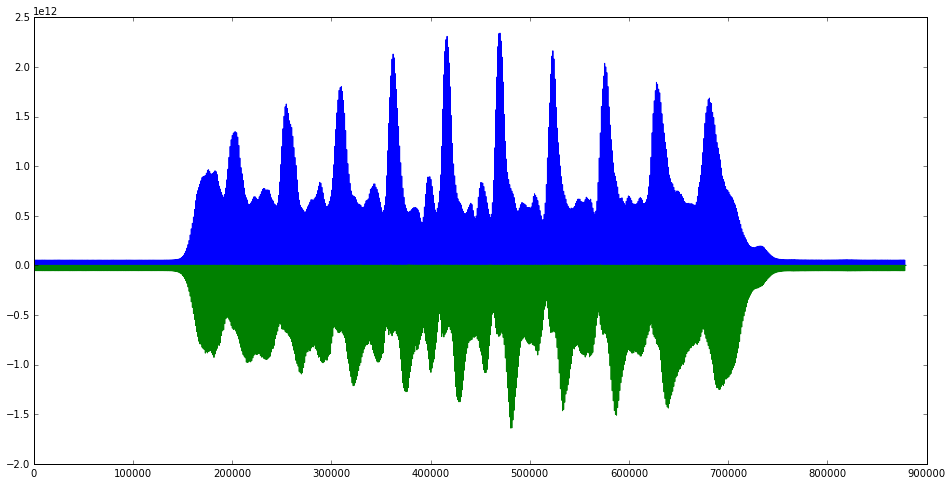

In [197]:
plt.figure(figsize=(16,8))
plt.plot(dct(ims[0]).ravel()**2)
plt.plot(-dct(ims[1]).ravel()**2)

In [38]:
def imQual(im):
    return entropy(dct(im).ravel()**2)

In [36]:
dims = [1000,2000]
tmp = np.random.randint(100,200,dims).astype('float64')
tmp = np.zeros(dims)
cell = morph.disk(100)
tmp[np.ix_(dims[0] / 2 +np.arange(cell.shape[0]),dims[1] / 2 +np.arange(cell.shape[1]))] = cell
sigma = 3
testIms = [tmp, filt.gaussian_filter(tmp,sigma=sigma), filt.gaussian_filter(tmp,sigma=3*sigma)]

CPU times: user 264 ms, sys: 49.3 ms, total: 313 ms
Wall time: 313 ms


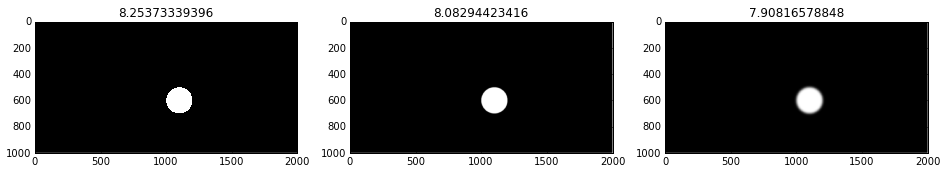

In [37]:
%%time
plt.figure(figsize=(16,8))
plt.subplot(131)
plt.imshow(testIms[0], interpolation='None', cmap='gray')
plt.title(imQual(testIms[0]))

plt.subplot(132)
plt.imshow(testIms[1], interpolation='None', cmap='gray')
plt.title(imQual(testIms[1]))

plt.subplot(133)
plt.imshow(testIms[2], interpolation='None', cmap='gray')
plt.title(imQual(testIms[2]))
